In [ ]:
import pandas as pd

In [ ]:
# Load CSV file
df = pd.read_csv("AgressiveOnly.csv")

# View first few rows
print(df.head())

# Check shape (rows, columns)
print(df.shape)


   No.                                            Message
0    1  zhha Islam does nothing but freeze the status ...
1    2                       You dont get out much do you
2    3  MaxBlumenthal Campagnebds Blumenthal self prom...
3    4  No silly it isnt ITS UR MOMS and might I say q...
4    5  Yes there is even more rape in Muslim countrie...
(118828, 2)


In [ ]:
df2 = pd.read_csv("NonAgressiveOnly.csv")

# Check shape (rows, columns)
print(df.shape)

(118828, 2)


In [ ]:
df.isnull().sum()

,0
No.,0
Message,21


In [ ]:
df2.isnull().sum()

,0
No.,0
Message,50


In [ ]:
#This will remove the null values
df = df.dropna(subset=["No.", "Message"])

In [ ]:
#There are no null values because we removed it
df.isnull().sum()

,0
No.,0
Message,0


In [ ]:
from collections import Counter

all_words = " ".join(df["Message"]).lower().split()
word_counts = Counter(all_words)

common_words = word_counts.most_common(10)
words, counts = zip(*common_words)

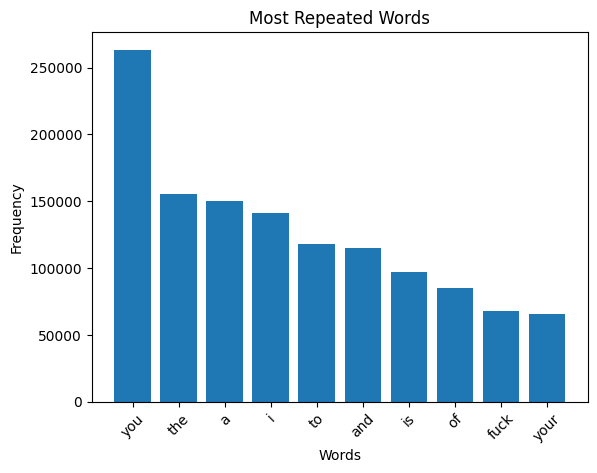

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(words, counts)
plt.title("Most Repeated Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

## Vectorizing using TF-IDF

In [ ]:
# Importing the vector embedding library
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
#The line below removes common words (the, is, and)
    stop_words="english",
#max_features=10000 keeps the top 10000 important words
    max_features=10000
    #max_features=5000
)

X = tfidf.fit_transform(df["Message"])
y = df["No."]


### Looking at most repeated words after applying TF-IDF

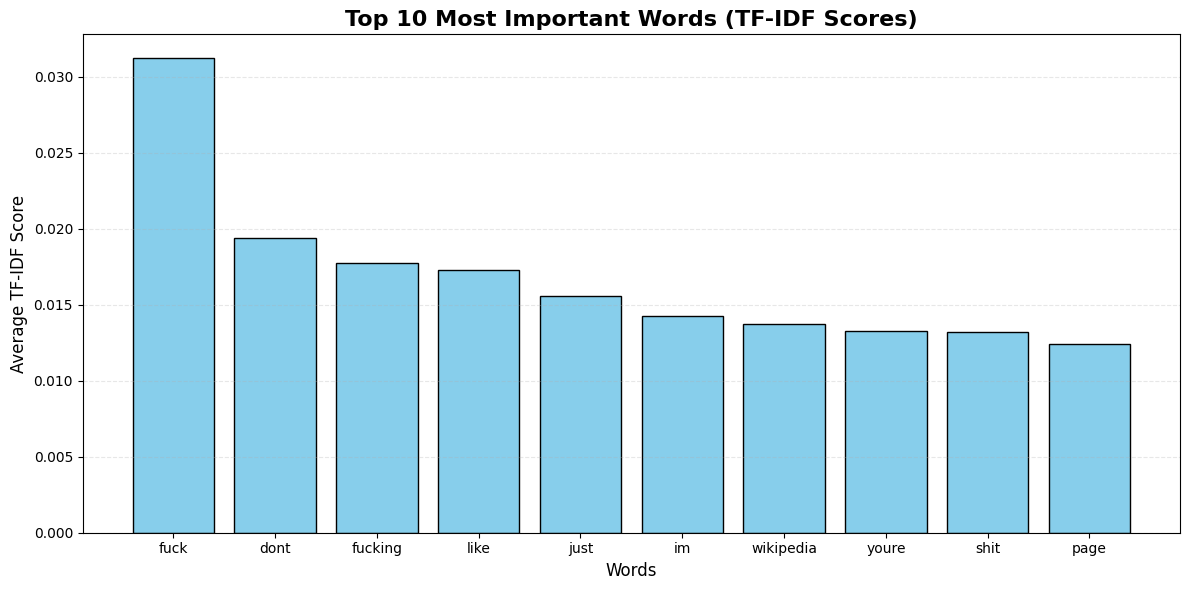

In [ ]:
import numpy as np

# Get the feature names (words) from your already-fitted tfidf
feature_names = tfidf.get_feature_names_out()

# Calculate average TF-IDF score for each word across all documents
# X is the TF-IDF matrix from fit_transform
average_tfidf_scores = np.array(X.mean(axis=0)).flatten()

# Create sorted indices for top N words
N = 10
sorted_indices = np.argsort(average_tfidf_scores)[::-1][:N]  # Descending order

# Get top N words and their scores
top_words = feature_names[sorted_indices]
top_scores = average_tfidf_scores[sorted_indices]

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(top_words, top_scores, color='skyblue', edgecolor='black')
plt.title(f"Top {N} Most Important Words (TF-IDF Scores)", fontsize=16, fontweight='bold')
plt.xlabel("Words", fontsize=12)
plt.ylabel("Average TF-IDF Score", fontsize=12)

plt.tight_layout()
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.show()

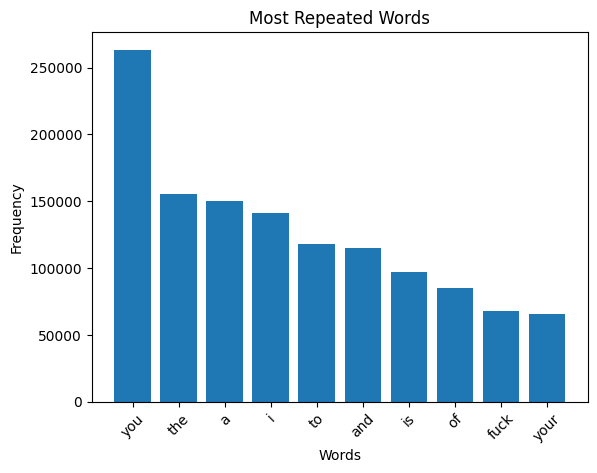

In [ ]:
plt.figure()
plt.bar(words, counts)
plt.title("Most Repeated Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

# Applied ML

In [ ]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
bully_df = pd.read_csv("AgressiveOnly.csv")
normal_df = pd.read_csv("NonAgressiveOnly.csv")

print(bully_df.head())
print(normal_df.head())


   No.                                            Message
0    1  zhha Islam does nothing but freeze the status ...
1    2                       You dont get out much do you
2    3  MaxBlumenthal Campagnebds Blumenthal self prom...
3    4  No silly it isnt ITS UR MOMS and might I say q...
4    5  Yes there is even more rape in Muslim countrie...
   No.                                            Message
0    1  Libya casualty report French operations   You ...
1    2  Just for the record that IP is blocked for  ho...
2    3  Big Brother Australia   I see you have partial...
3    4  WikipediaFeatured portal candidatesPortalOrgan...
4    5  wiki cant edit   could you make Thai airways s...


In [ ]:
# Add labels to each dataframe
bully_df["label"] = 1  # 1 for aggressive
normal_df["label"] = 0  # 0 for non-aggressive

In [ ]:
# Combine both datasets
df = pd.concat([bully_df, normal_df], ignore_index=True)

print("DataFrame shape:", df.shape)
print("\nLabel distribution:")
print(df["label"].value_counts())

DataFrame shape: (237656, 3)

Label distribution:
label
1    118828
0    118828
Name: count, dtype: int64


In [ ]:
#Remove null values
# Remove null values from the Message column specifically
print(f"\nMissing values in Message column before cleaning: {df['Message'].isnull().sum()}")
df = df.dropna(subset=['Message'])  # Only drop rows where Message is NaN
print(f"Missing values in Message column after cleaning: {df['Message'].isnull().sum()}")


Missing values in Message column before cleaning: 71
Missing values in Message column after cleaning: 0


In [ ]:
#Split features and labels
X = df["Message"]
y = df["label"]

In [ ]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
# stratify=y keeps class balance in train and test sets.

In [ ]:
print(f"\nTraining set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")
print(f"\nTraining label distribution:\n{y_train.value_counts()}")
print(f"\nTest label distribution:\n{y_test.value_counts()}")


Training set size: 190068
Test set size: 47517

Training label distribution:
label
1    95046
0    95022
Name: count, dtype: int64

Test label distribution:
label
1    23761
0    23756
Name: count, dtype: int64


In [ ]:
# Now we vectorize the text and train models
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
# Train Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
y_pred_nb = nb_model.predict(X_test_tfidf)

In [ ]:
print("="*50)
print("NAIVE BAYES RESULTS")
print("="*50)
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb, target_names=['Non-Aggressive', 'Aggressive']))

NAIVE BAYES RESULTS
Accuracy: 0.8360

Classification Report:
                precision    recall  f1-score   support

Non-Aggressive       0.85      0.82      0.83     23756
    Aggressive       0.82      0.85      0.84     23761

      accuracy                           0.84     47517
     macro avg       0.84      0.84      0.84     47517
  weighted avg       0.84      0.84      0.84     47517



In [ ]:
# Train Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_tfidf, y_train)
y_pred_lr = lr_model.predict(X_test_tfidf)

In [ ]:
print("\n" + "="*50)
print("LOGISTIC REGRESSION RESULTS")
print("="*50)
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr, target_names=['Non-Aggressive', 'Aggressive']))


LOGISTIC REGRESSION RESULTS
Accuracy: 0.8649

Classification Report:
                precision    recall  f1-score   support

Non-Aggressive       0.85      0.89      0.87     23756
    Aggressive       0.88      0.84      0.86     23761

      accuracy                           0.86     47517
     macro avg       0.87      0.86      0.86     47517
  weighted avg       0.87      0.86      0.86     47517



In [ ]:
# Confusion Matrices
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
# Naive Bayes confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
print("\n" + "="*50)
print("NAIVE BAYES CONFUSION MATRIX")
print("="*50)
print(cm_nb)
print(f"True Negatives: {cm_nb[0,0]}")
print(f"False Positives: {cm_nb[0,1]}")
print(f"False Negatives: {cm_nb[1,0]}")
print(f"True Positives: {cm_nb[1,1]}")


NAIVE BAYES CONFUSION MATRIX
[[19443  4313]
 [ 3481 20280]]
True Negatives: 19443
False Positives: 4313
False Negatives: 3481
True Positives: 20280


In [ ]:
# Logistic Regression confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
print("\n" + "="*50)
print("LOGISTIC REGRESSION CONFUSION MATRIX")
print("="*50)
print(cm_lr)
print(f"True Negatives: {cm_lr[0,0]}")
print(f"False Positives: {cm_lr[0,1]}")
print(f"False Negatives: {cm_lr[1,0]}")
print(f"True Positives: {cm_lr[1,1]}")


LOGISTIC REGRESSION CONFUSION MATRIX
[[21099  2657]
 [ 3761 20000]]
True Negatives: 21099
False Positives: 2657
False Negatives: 3761
True Positives: 20000
